In [21]:
import geopandas as gpd
import pandas as pd
from shapely import wkb
import matplotlib.pyplot as plt

In [26]:
# this process because I got a type error:
#This tells us that your geometry column is encoded as raw WKB bytes, not shapely geometry objects. That happens when:

#I saved a GeoDataFrame to Parquet without using GeoPandas

#Or reloaded it using pandas.read_parquet() instead of gpd.read_parquet()

#Then tried to pass those raw bytes into GeoPandas or a spatial function



# Load with pandas (raw WKB geometry)
#df = pd.read_parquet("../data/processed/hex_with_predictions.parquet")

# Convert geometry column from WKB to shapely objects
#df['geometry'] = df['geometry'].apply(wkb.loads)

# Rebuild as GeoDataFrame
#hex_grid = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:3857")

hex_grid = gpd.read_parquet("../data/processed/hex_with_predictions.parquet")

<Axes: >

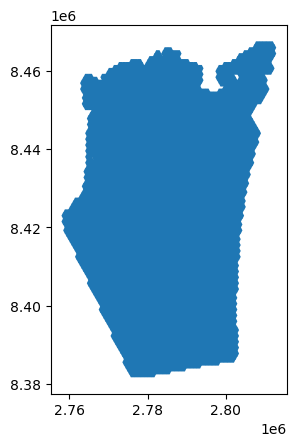

In [28]:
#hex_grid.plot()

In [ ]:
hex_grid['underserved_score'] = hex_grid['predicted'] * hex_grid['population']

In [ ]:
ranked_hexes = hex_grid.sort_values(by='underserved_score', ascending=False)
ranked_hexes[['predicted', 'population', 'underserved_score']].head(10)

,predicted,population,underserved_score
3930,14752.230337,2238.834961,3.302781e+07
3883,14897.609941,2147.936035,3.199911e+07
3931,14844.062224,2100.638916,3.118201e+07
3882,14163.126069,2148.225586,3.042559e+07
3834,13877.223218,2191.571777,3.041293e+07
3786,14309.034998,2099.395264,3.004032e+07
3785,13498.731562,2215.714600,2.990934e+07
3929,14065.889846,2071.547119,2.913815e+07
3784,12889.309707,2255.649414,2.907376e+07
3979,14897.401772,1947.243042,2.900886e+07


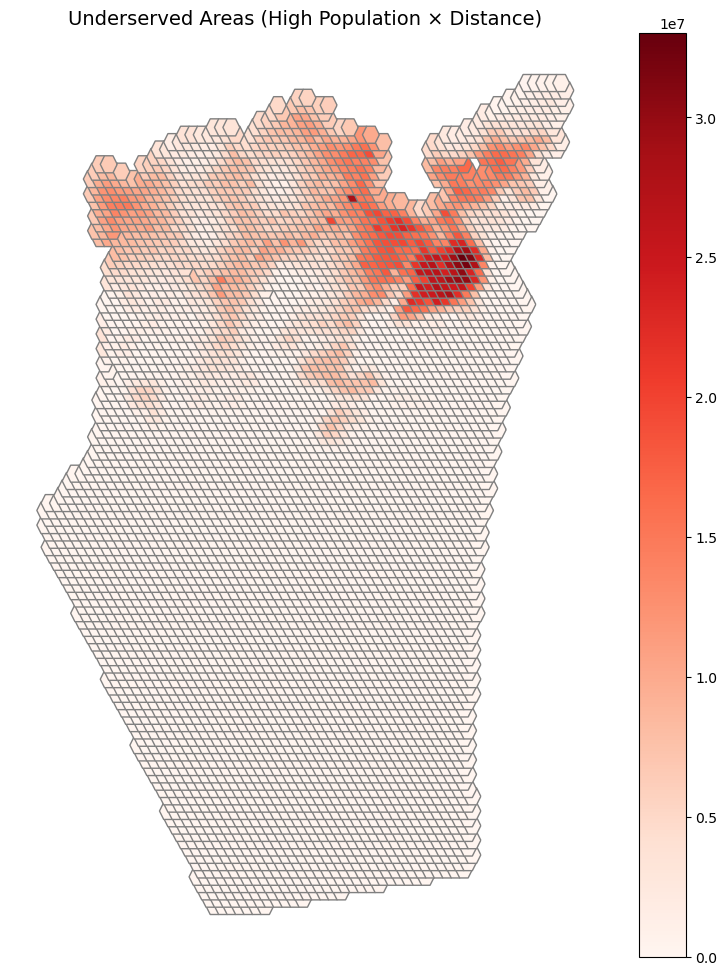

In [34]:
fig, ax = plt.subplots(figsize=(10, 12))
hex_grid.plot(column='underserved_score', cmap='Reds', legend=True, edgecolor='grey', ax=ax)
ax.set_title("Underserved Areas (High Population × Distance)", fontsize=14)
ax.axis('off')
plt.show()

In [ ]:
hex_grid.to_parquet("../data/processed/hex_ranked.parquet")

In [ ]:
top_hexes = ranked_hexes.head(50)
top_hexes.to_file("../data/outputs/top_underserved.geojson", driver="GeoJSON")